In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('../Dataset/dataSetv3.csv')

In [15]:
df.head()

,eth.src,eth.dst,frame.len,time_interval,time_increment,label
0,1,0,54,0.000000,0.000000,0
1,1,0,66,0.018659,0.018659,0
2,0,1,73,0.000244,0.018903,0
3,0,1,1288,0.574208,0.593111,0
4,0,1,1292,0.000074,0.593185,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26107 entries, 0 to 26106
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   eth.src         26107 non-null  int64  
 1   eth.dst         26107 non-null  int64  
 2   frame.len       26107 non-null  int64  
 3   time_interval   26107 non-null  float64
 4   time_increment  26107 non-null  float64
 5   label           26107 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1.2 MB


In [20]:
df.describe()

,eth.src,eth.dst,frame.len,time_interval,time_increment,label
count,26107.000000,26107.000000,26107.000000,26107.000000,26107.000000,26107.00000
mean,0.668020,0.331980,762.689853,0.001318,3.760714,2.00046
std,0.470933,0.470933,622.326470,0.013848,2.393880,1.33016
min,0.000000,0.000000,42.000000,-0.000104,0.000000,0.00000
25%,0.000000,0.000000,86.000000,0.000000,1.982904,1.00000
50%,1.000000,0.000000,958.000000,0.000036,3.033506,1.00000
75%,1.000000,1.000000,1294.000000,0.000338,5.349296,3.00000
max,1.000000,1.000000,1514.000000,0.903164,11.752250,4.00000


### Analysing only the numerical data in the dataset

In [16]:
dfn = df.drop(['eth.src','eth.dst'], axis=1)
dfn

,frame.len,time_interval,time_increment,label
0,54,0.000000,0.000000,0
1,66,0.018659,0.018659,0
2,73,0.000244,0.018903,0
3,1288,0.574208,0.593111,0
4,1292,0.000074,0.593185,0
...,...,...,...,...
26102,74,0.004578,6.642091,4
26103,83,0.038501,6.680592,4
26104,83,0.225305,6.905897,4
26105,83,0.409637,7.315534,4


### EDA

C:\Users\tejve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


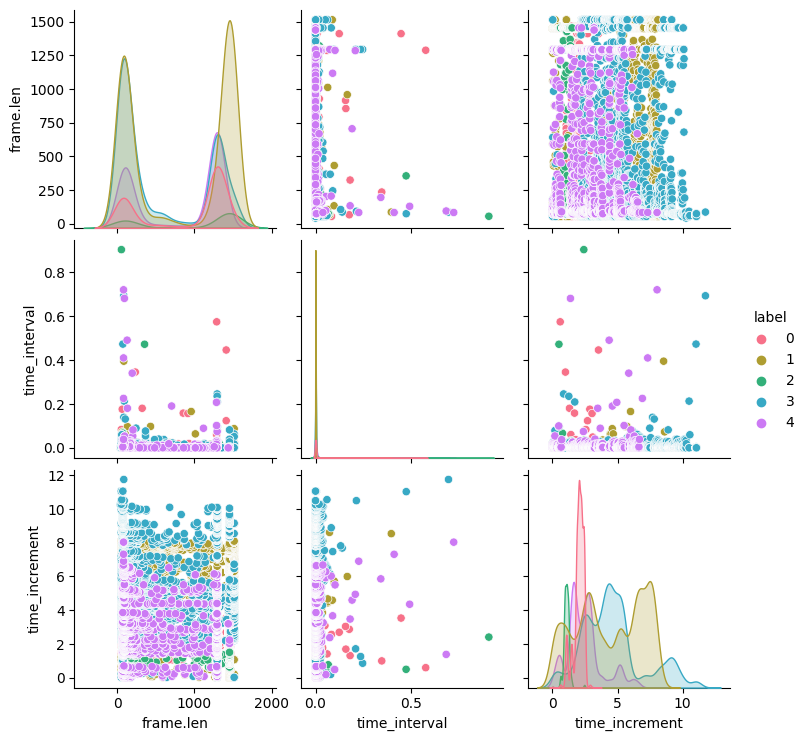

In [17]:
custom_palette = sns.color_palette("husl", n_colors=len(df['label'].unique()))
sns.pairplot(dfn, hue="label", palette=custom_palette)

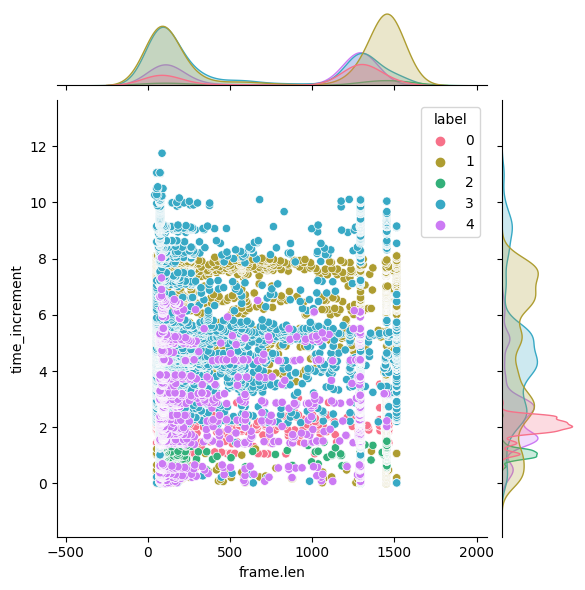

In [18]:
sns.jointplot(data= df, x='frame.len', y='time_increment', hue='label', palette=custom_palette)

In [21]:
dfn = df[df['time_interval'] >= 0.0]

In [22]:
dfn.describe()

,eth.src,eth.dst,frame.len,time_interval,time_increment,label
count,26099.000000,26099.000000,26099.000000,26099.000000,26099.000000,26099.000000
mean,0.667918,0.332082,762.500556,0.001318,3.760853,2.000460
std,0.470969,0.470969,622.325913,0.013850,2.393621,1.330191
min,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,86.000000,0.000000,1.982904,1.000000
50%,1.000000,0.000000,954.000000,0.000037,3.033927,1.000000
75%,1.000000,1.000000,1294.000000,0.000338,5.349296,3.000000
max,1.000000,1.000000,1514.000000,0.903164,11.752250,4.000000


In [23]:
dfn['label'].value_counts()

label
1    10499
3     7751
4     4181
0     2801
2      867
Name: count, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [29]:
X = dfn.drop(['label', 'eth.src', 'eth.dst', 'time_interval'],axis=1)
y = dfn['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

In [23]:
## with the source destination flags
X = dfn.drop(['label', 'time_interval'],axis=1)
y = dfn['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=101)

In [30]:
y_train.value_counts()

label
1    8337
3    6246
4    3336
0    2251
2     709
Name: count, dtype: int64

In [41]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## below are CV code 
# they take long time to run, run carefully !

In [31]:
# Random Forest

param_grid_rf = {'n_estimators': np.arange(1, 101, 10)}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=101), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=101),
             param_grid={'n_estimators': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='accuracy')

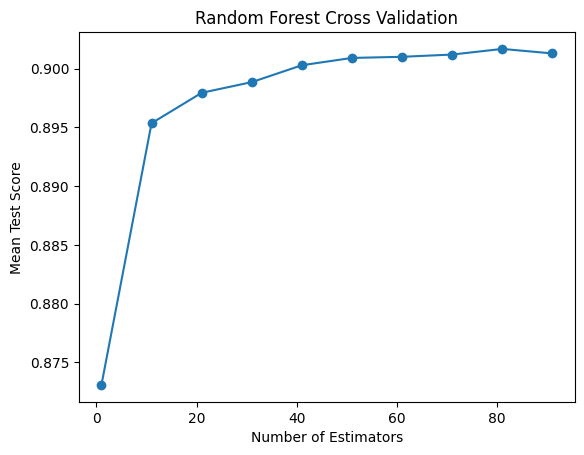

In [32]:
# Plotting the elbow graph for Random Forest
plt.plot(param_grid_rf['n_estimators'], grid_search_rf.cv_results_['mean_test_score'], marker='o')
plt.title('Random Forest Cross Validation')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

In [34]:
# AdaBoost
param_grid_adaboost = {'n_estimators': [1, 10, 15, 20, 30, 50, 60, 80, 100]}
grid_search_adaboost = GridSearchCV(AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101), random_state=101),
                                    param_grid_adaboost, cv=5, scoring='accuracy')
grid_search_adaboost.fit(X_train, y_train)

C:\Users\tejve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\tejve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\tejve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\tejve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-pac

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=101),
                                          random_state=101),
             param_grid={'n_estimators': [1, 10, 15, 20, 30, 50, 60, 80, 100]},
             scoring='accuracy')

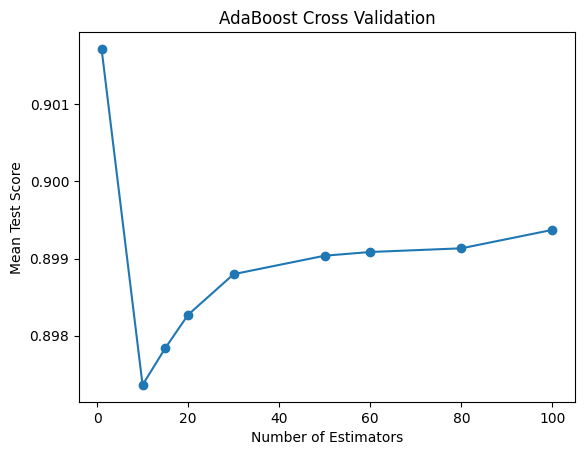

In [36]:
# Plotting the elbow graph for AdaBoost
plt.plot(param_grid_adaboost['n_estimators'], grid_search_adaboost.cv_results_['mean_test_score'], marker='o')
plt.title('AdaBoost Cross Validation')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

### We will consider the best values from above CV - n_estimator = 55 for both random forest and adaboost 

In [37]:
base_rf_classifier = RandomForestClassifier(n_estimators=55, random_state=101)
adaboost_classifier = AdaBoostClassifier(base_estimator=base_rf_classifier, n_estimators=55, random_state=101)

In [38]:
adaboost_classifier.fit(X_train, y_train)

C:\Users\tejve\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=55,
                                                         random_state=101),
                   n_estimators=55, random_state=101)

In [39]:
y_pred = adaboost_classifier.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9080459770114943


In [45]:
from sklearn.metrics import confusion_matrix,classification_report

In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 503   11    3   13   20]
 [  11 2006   10  106   29]
 [   0    8  146    0    4]
 [  15  143    3 1319   25]
 [  15   19    0   45  766]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       550
           1       0.92      0.93      0.92      2162
           2       0.90      0.92      0.91       158
           3       0.89      0.88      0.88      1505
           4       0.91      0.91      0.91       845

    accuracy                           0.91      5220
   macro avg       0.91      0.91      0.91      5220
weighted avg       0.91      0.91      0.91      5220

